# Assignment 1 Python

In [276]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## CSV Data import

In [4]:
data = 'london_crime_by_lsoa.csv'
missing_values = ['n/a', 'na', '--']
df = pd.read_csv(data, na_values = missing_values)

In [5]:
df.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [6]:
df.tail(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
13490594,E01001706,Greenwich,Criminal Damage,Criminal Damage To Other Building,0,2008,2
13490595,E01001144,Croydon,Violence Against the Person,Harassment,0,2012,1
13490596,E01000655,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490597,E01000588,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,2014,10
13490598,E01032577,Hillingdon,Theft and Handling,Other Theft,0,2012,2
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [7]:
# melakukan pengecekan apakah ada data kosong
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [9]:
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [10]:
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [11]:
df.shape

(13490604, 7)

In [12]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [13]:
df.sort_values(['year'], axis = 0, ascending = True)

,lsoa_code,borough,major_category,minor_category,value,year,month
12504370,E01001255,Ealing,Violence Against the Person,Assault with Injury,0,2008,6
5807276,E01002790,Islington,Violence Against the Person,Harassment,0,2008,2
5807272,E01003634,Newham,Burglary,Burglary in Other Buildings,0,2008,9
8512153,E01033698,Hackney,Theft and Handling,Motor Vehicle Interference & Tampering,0,2008,8
5807264,E01004565,Wandsworth,Drugs,Possession Of Drugs,0,2008,3
...,...,...,...,...,...,...,...
6171475,E01001309,Ealing,Theft and Handling,Other Theft,1,2016,5
6171480,E01001534,Enfield,Criminal Damage,Criminal Damage To Dwelling,0,2016,3
11948556,E01004357,Waltham Forest,Violence Against the Person,Offensive Weapon,0,2016,9
6171412,E01001954,Hammersmith and Fulham,Drugs,Possession Of Drugs,0,2016,6


In [14]:
# Mencari jumlah insiden kriminal antara tahun 2011 - 2016
crime_year = df.groupby(['year']).agg('sum')['value']
crime_year

year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: value, dtype: int64

## Chart for total Crime 2008-2016

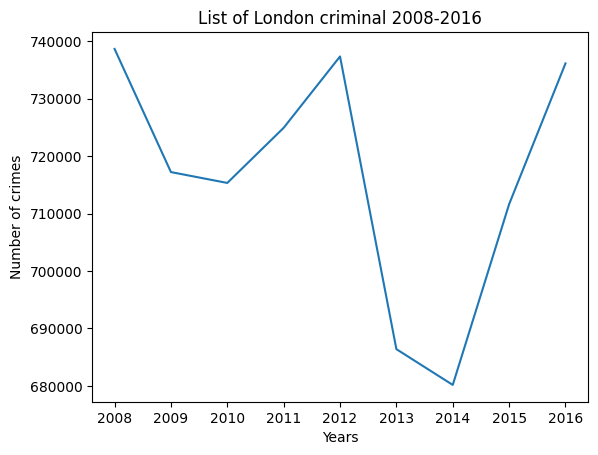

In [15]:
df.groupby(['year']).agg('sum')['value'].plot(kind='line')

plt.title('List of London criminal 2008-2016')
plt.ylabel('Number of crimes')
plt.xlabel('Years')

plt.show()

<AxesSubplot:xlabel='year'>

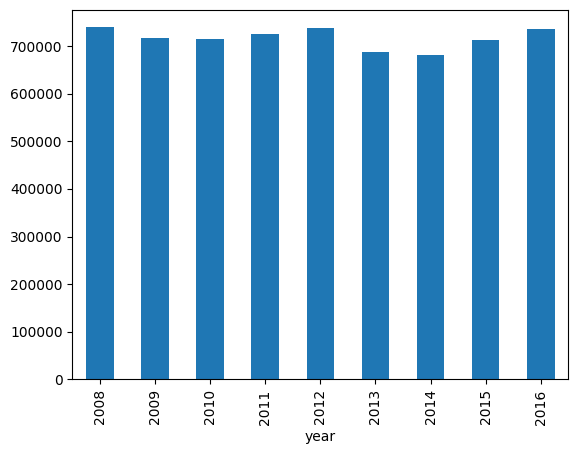

In [16]:
crime_year_plotbar = df.groupby(['year']).agg('sum')['value'].plot.bar()
crime_year_plotbar

In [17]:
df3 = pd.DataFrame({'count': df.groupby(['year', 'borough', 'major_category'])['value'].sum().loc[2016]}).reset_index()


In [18]:
df3 = df3.sort_values(by=['borough', 'count'], ascending=False)

In [19]:
df3 = df3.groupby('borough').head(3).reset_index()
df3

,index,borough,major_category,count
0,293,Westminster,Theft and Handling,27520
1,294,Westminster,Violence Against the Person,10834
2,286,Westminster,Burglary,3218
3,284,Wandsworth,Theft and Handling,10789
4,285,Wandsworth,Violence Against the Person,6809
...,...,...,...,...
94,17,Barnet,Violence Against the Person,7499
95,9,Barnet,Burglary,3402
96,8,Barking and Dagenham,Violence Against the Person,6067
97,7,Barking and Dagenham,Theft and Handling,5607


In [20]:
df3.drop('index', axis=1)

,borough,major_category,count
0,Westminster,Theft and Handling,27520
1,Westminster,Violence Against the Person,10834
2,Westminster,Burglary,3218
3,Wandsworth,Theft and Handling,10789
4,Wandsworth,Violence Against the Person,6809
...,...,...,...
94,Barnet,Violence Against the Person,7499
95,Barnet,Burglary,3402
96,Barking and Dagenham,Violence Against the Person,6067
97,Barking and Dagenham,Theft and Handling,5607


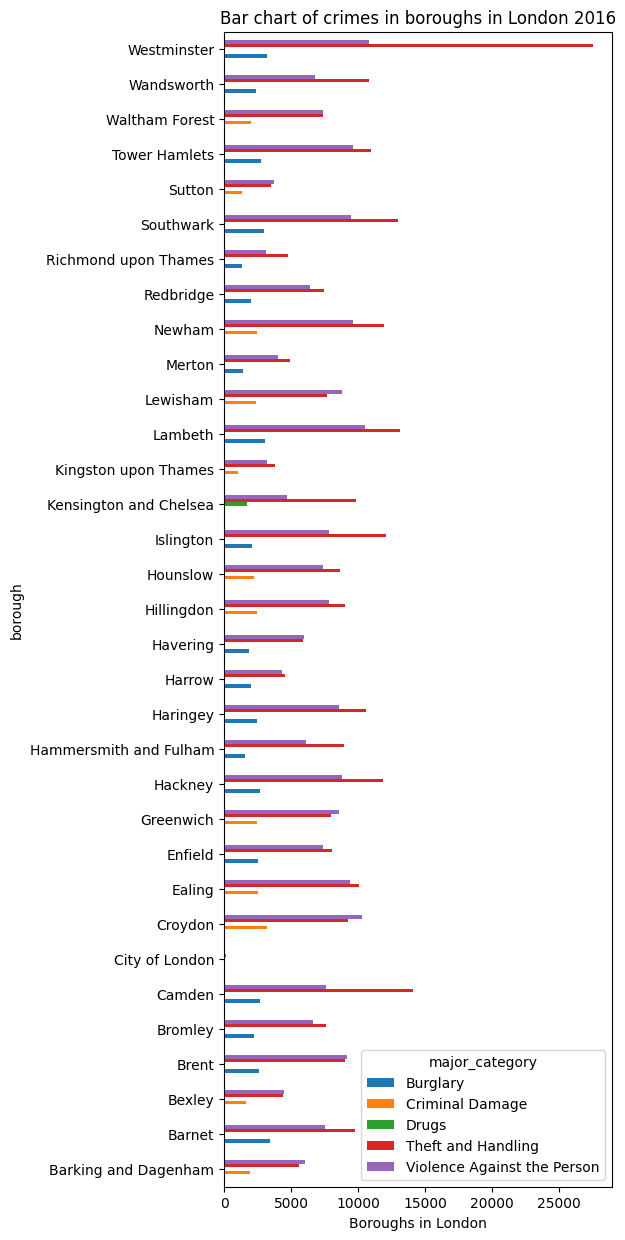

In [21]:
df3 = df3.pivot(index='borough', columns='major_category', values='count')
df3
df3.plot(kind='barh', figsize=(5,15))
plt.xlabel('Boroughs in London')
plt.title('Bar chart of crimes in boroughs in London 2016')
plt.show()


## Scatter plot for Burglary crimes in London from 2008 - 2016

In [114]:
df4 = pd.DataFrame({'count': df.groupby(['major_category', 'year'])['value'].sum().loc['Burglary']}).reset_index()
df4


,year,count
0,2008,88092
1,2009,90619
2,2010,86826
3,2011,93315
4,2012,93392
5,2013,87222
6,2014,76053
7,2015,70489
8,2016,68285


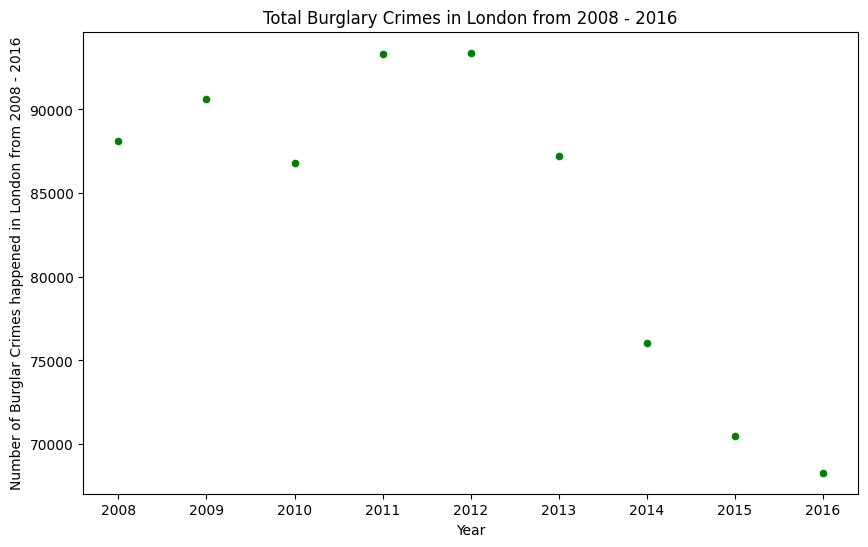

In [115]:
df4.plot(kind='scatter', x='year', y='count', figsize=(10,6), color='green')

plt.title('Total Burglary Crimes in London from 2008 - 2016')
plt.xlabel('Year')
plt.ylabel('Number of Burglar Crimes happened in London from 2008 - 2016')

plt.show()

## Pie chart for crimes in Greenwich 2008-2016

In [92]:
df5 = pd.DataFrame({'count': df.groupby(['borough', 'major_category'])['value'].sum().loc['Greenwich']})
#df5.set_index(['major_category'])
df5.head(10)

,count
major_category,
Burglary,20966
Criminal Damage,22755
Drugs,10836
Fraud or Forgery,107
Other Notifiable Offences,3598
Robbery,5430
Sexual Offences,56
Theft and Handling,64923
Violence Against the Person,52897


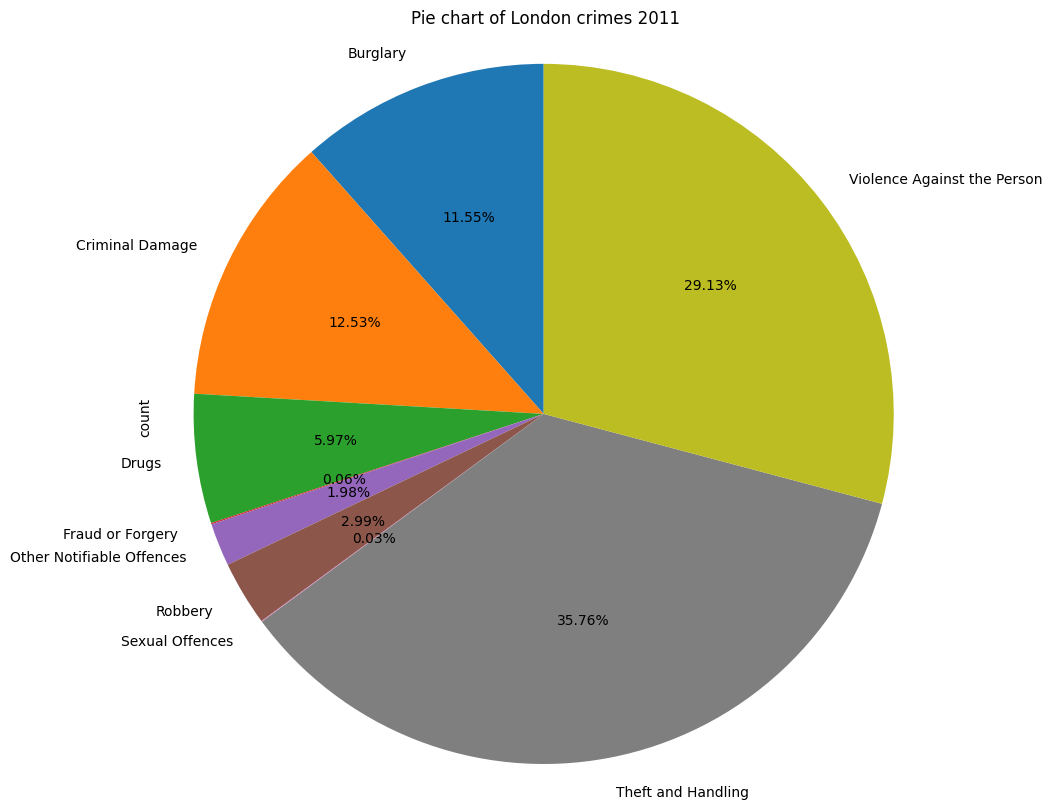

In [237]:
df5['count'].plot(kind='pie', figsize=(10,10), autopct='%1.2f%%', startangle=90)
plt.title('Pie chart of London crimes 2011')
plt.axis('equal')
plt.show()

## Box plot of Crimes in Croydon, London from 2008 - 2016

In [120]:
df6 = pd.DataFrame({'count': df.groupby(['borough', 'year'])['value'].sum().loc['Croydon']})
df6

,count
year,
2008,29516
2009,29784
2010,29373
2011,29830
2012,30189
2013,27444
2014,27357
2015,28089
2016,28712


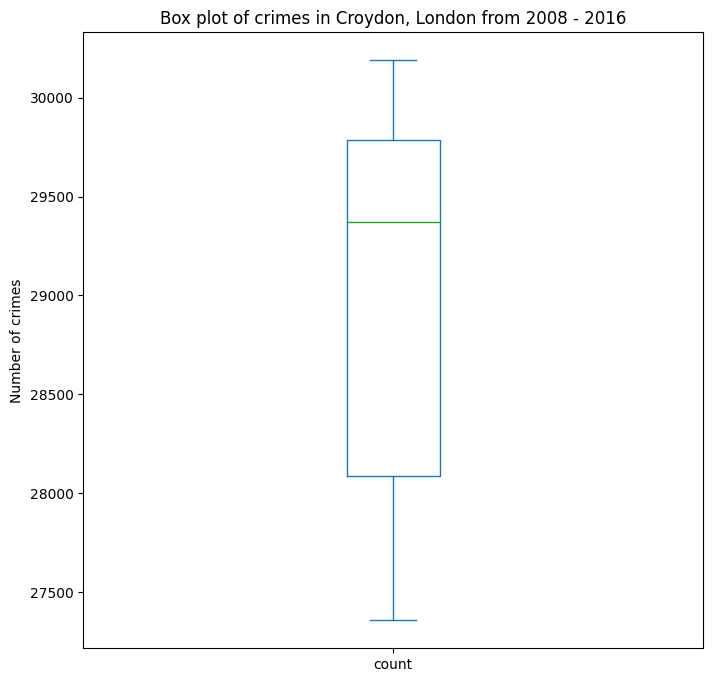

In [121]:
df6.plot(kind='box', figsize=(8, 8))

plt.title('Box plot of crimes in Croydon, London from 2008 - 2016')
plt.ylabel('Number of crimes')

plt.show()

## Area Plot

In [243]:
df_arplot = df.groupby(['year', 'major_category'])['value'].sum()
df_arplot.iloc[:3]

year  major_category 
2008  Burglary           88092
      Criminal Damage    91872
      Drugs              68804
Name: value, dtype: int64

In [244]:
df_data = pd.DataFrame({'count': df.groupby(['year', 'major_category'])['value'].sum()}).reset_index()
df_data

,year,major_category,count
0,2008,Burglary,88092
1,2008,Criminal Damage,91872
2,2008,Drugs,68804
3,2008,Fraud or Forgery,5325
4,2008,Other Notifiable Offences,10112
...,...,...,...
76,2016,Other Notifiable Offences,15809
77,2016,Robbery,22528
78,2016,Sexual Offences,0
79,2016,Theft and Handling,294133


In [246]:
df_data2 = pd.DataFrame({'count': df.groupby(['major_category'])['value'].sum()}).reset_index()
df_data2

,major_category,count
0,Burglary,754293
1,Criminal Damage,630938
2,Drugs,470765
3,Fraud or Forgery,5325
4,Other Notifiable Offences,106349
5,Robbery,258873
6,Sexual Offences,1273
7,Theft and Handling,2661861
8,Violence Against the Person,1558081


In [271]:
df_bulg = pd.DataFrame({'count': df.groupby(['major_category', 'year'])['value'].sum().loc['Burglary']}).reset_index()
df_bulg.drop('year', axis=1)
df_bulg

,year,count
0,2008,88092
1,2009,90619
2,2010,86826
3,2011,93315
4,2012,93392
5,2013,87222
6,2014,76053
7,2015,70489
8,2016,68285


In [269]:
df_drug = pd.DataFrame({'count': df.groupby(['major_category', 'year'])['value'].sum().loc['Drugs']}).reset_index()
df_drug.drop('year', axis=1)
df_drug

,year,count
0,2008,68804
1,2009,60549
2,2010,58674
3,2011,57550
4,2012,51776
5,2013,50278
6,2014,44435
7,2015,39785
8,2016,38914


In [270]:
df_violence = pd.DataFrame({'count': df.groupby(['major_category', 'year'])['value'].sum().loc['Violence Against the Person']}).reset_index()
df_violence.drop('year', axis=1)
df_violence

,year,count
0,2008,159844
1,2009,160777
2,2010,157894
3,2011,146901
4,2012,150014
5,2013,146181
6,2014,185349
7,2015,218740
8,2016,232381


In [268]:
df_rob = pd.DataFrame({'count': df.groupby(['major_category', 'year'])['value'].sum().loc['Robbery']}).reset_index()
df_rob.drop('year', axis=1)
df_rob

,year,count
0,2008,29627
1,2009,29568
2,2010,32341
3,2011,36679
4,2012,35260
5,2013,29337
6,2014,22150
7,2015,21383
8,2016,22528


In [274]:
df_areaplot = pd.DataFrame({'count': df.groupby(['year'])['value'].sum()}).reset_index()
df_areaplot['Bulglary'] = df_bulg.drop(['year'], axis=1)
df_areaplot['Robbery'] = df_rob.drop(['year'], axis=1)
df_areaplot['Violence Against the Person'] = df_violence.drop(['year'], axis=1)
df_areaplot['Drugs'] = df_drug.drop(['year'], axis=1)
df_areaplot

,year,count,Bulglary,Robbery,Violence Against the Person,Drugs
0,2008,738641,88092,29627,159844,68804
1,2009,717214,90619,29568,160777,60549
2,2010,715324,86826,32341,157894,58674
3,2011,724915,93315,36679,146901,57550
4,2012,737329,93392,35260,150014,51776
5,2013,686407,87222,29337,146181,50278
6,2014,680183,76053,22150,185349,44435
7,2015,711624,70489,21383,218740,39785
8,2016,736121,68285,22528,232381,38914


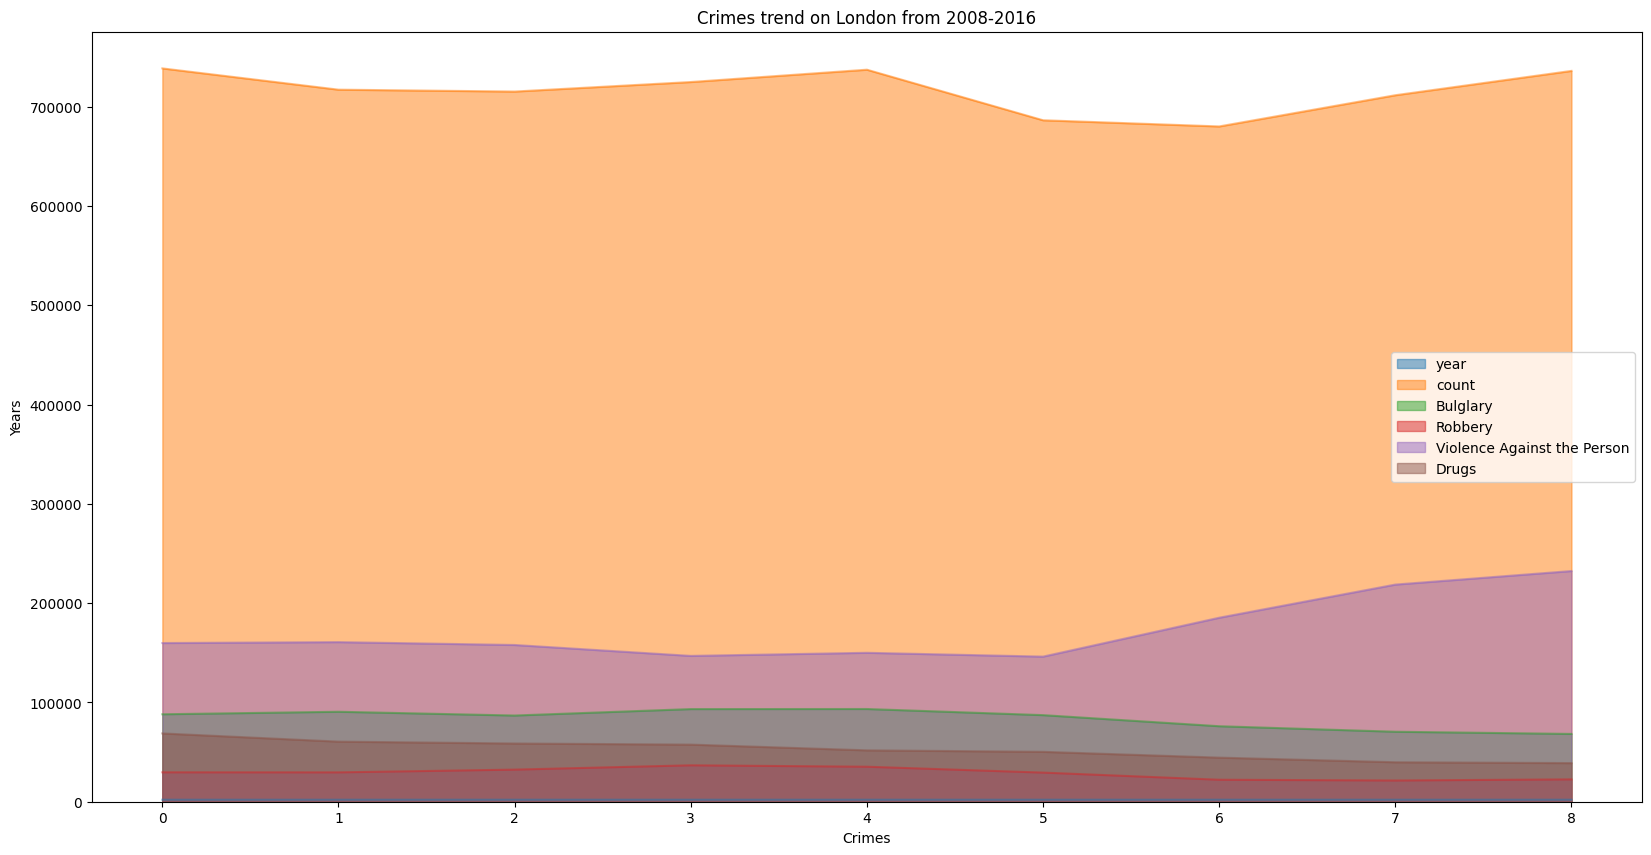

In [275]:
df_areaplot.plot(kind='area', stacked=False,figsize=(20,10),)

plt.title('Crimes trend on London from 2008-2016')
plt.xlabel('Crimes')
plt.ylabel('Years')

plt.show()

## Histogram of Crimes from 32 boroughs in 2008

In [225]:
df9 = pd.DataFrame({'count': df.groupby(['year','borough'])['value'].sum().loc[2008]})
df9.head()


,count
borough,
Barking and Dagenham,17656
Barnet,23944
Bexley,15305
Brent,23504
Bromley,24015


In [226]:
count, bin_edges = np.histogram(df9)

print(count)
print(bin_edges)

[ 1  0  5  3 10  7  6  0  0  1]
[    0.   4784.6  9569.2 14353.8 19138.4 23923.  28707.6 33492.2 38276.8
 43061.4 47846. ]


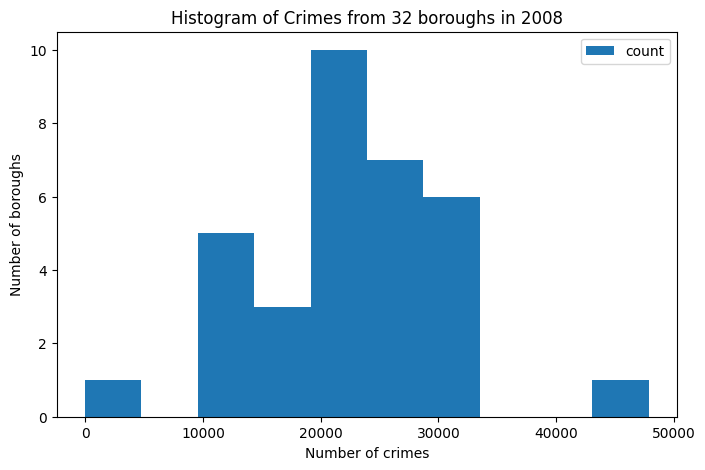

In [228]:
df9.plot(kind='hist', figsize=(8,5))

plt.title('Histogram of Crimes from 32 boroughs in 2008')
plt.xlabel('Number of crimes')
plt.ylabel('Number of boroughs')

plt.show()